In [1]:
import pandas as pd
import numpy as np

In [8]:
data_pv = pd.read_csv('/Users/muskanj/Documents/CS_TDS_506/property_violation.csv')
data_pv.head(n = 10)

,case_no,ap_case_defn_key,status_dttm,status,code,value,description,violation_stno,violation_sthigh,violation_street,...,ward,contact_addr1,contact_addr2,contact_city,contact_state,contact_zip,sam_id,latitude,longitude,location
0,V91983,1013,NaN,Closed,121.2,NaN,Unsafe and Dangerous,302,NaN,Sumner,...,01,302 Sumner St,NaN,East Boston,MA,02128,132380.0,42.367678,-71.036580,"(42.367678491254956, -71.0365803778755)"
1,V790092,1013,2025-03-28 14:32:25,Open,1001.3.3,NaN,NaN,41,NaN,High,...,02,41 HIGH ST,NaN,CHARLESTOWN,MA,02129,73395.0,42.376428,-71.062759,"(42.376427524512145, -71.06275941632299)"
2,V825069,1013,2025-03-28 14:11:11,Open,1001.3.2,NaN,Testing & Certification,463,NaN,Beacon,...,05,301 SOUTH AV,NaN,WESTON,MA,02493,11540.0,42.350930,-71.088211,"(42.35092955979684, -71.08821052970953)"
3,V825002,1013,2025-03-28 08:36:42,Open,116,NaN,Unsafe Structures,25,NaN,Greycliff,...,22,"500 LINCOLN ST, 2ND FLOOR",NaN,ALLSTON,MA,02134,67190.0,42.341000,-71.160781,"(42.34099965684139, -71.16078071632217)"
4,V824908,1013,2025-03-27 12:58:34,Open,105.1,NaN,Failure to Obtain Permit,19,NaN,Hiawatha,...,18,19 HIAWATHA RD,NaN,MATTAPAN,MA,02126,73219.0,42.276669,-71.094574,"(42.27666857767702, -71.09457371046959)"
5,V817070,1013,2025-03-27 09:52:12,Open,105.1,NaN,Failure to Obtain Permit,764,764A,Tremont,...,09,"169 West Springfield St, Unit C",NaN,Boston,MA,02118,170470.0,42.339543,-71.079229,"(42.33954280874566, -71.07922892925852)"
6,V822810,1013,2025-03-27 09:51:32,Open,1001.3.2,NaN,Testing & Certification,9,NaN,Ruggles,...,09,58 GAINSBOROUGH ST,NaN,BOSTON,MA,02115,169345.0,42.331439,-71.083068,"(42.33143903317276, -71.08306755096795)"
7,V822411,1013,2025-03-27 09:50:50,Open,1001.3.2,NaN,Testing & Certification,752,NaN,Tremont,...,09,74 CLARENDON ST SUITE A,C/O HEATH PROPERTIES,BOSTON,MA,02116,137944.0,42.339790,-71.078871,"(42.33978954843001, -71.07887053394887)"
8,V824231,1013,2025-03-25 10:06:12,Open,1006.1,NaN,Number of Exits or Exit Access,1618,1634,Blue Hill,...,18,1340 Centre Street,Suite 101,Newton,MA,02459,16338.0,42.268770,-71.093341,"(42.268769576641034, -71.09334072683531)"
9,V824070,1013,2025-03-24 14:45:16,Open,105.1,NaN,Failure to Obtain Permit,23,NaN,Grassmere,...,18,23 GRASSMERE RD,NaN,HYDE PARK,MA,02136,66017.0,42.268670,-71.129391,"(42.26866962746323, -71.12939080775053)"


In [48]:
mostly_nan = data_pv.isnull().mean()
print(mostly_nan[mostly_nan > 0.1])

value               1.000000
violation_sthigh    0.746911
contact_addr2       0.820565
dtype: float64


In [50]:
cols_to_drop = ['value', 'violation_sthigh', 'contact_addr2']

data_pv = data_pv.drop(columns=cols_to_drop)

In [52]:
data_pv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16591 entries, 0 to 16590
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   case_no           16591 non-null  object 
 1   ap_case_defn_key  16591 non-null  int64  
 2   status_dttm       16590 non-null  object 
 3   status            16591 non-null  object 
 4   code              16591 non-null  object 
 5   description       16344 non-null  object 
 6   violation_stno    16591 non-null  object 
 7   violation_street  16591 non-null  object 
 8   violation_suffix  16447 non-null  object 
 9   violation_city    16591 non-null  object 
 10  violation_state   16591 non-null  object 
 11  violation_zip     16589 non-null  object 
 12  ward              16591 non-null  object 
 13  contact_addr1     16586 non-null  object 
 14  contact_city      16589 non-null  object 
 15  contact_state     16589 non-null  object 
 16  contact_zip       16578 non-null  object

In [54]:
mostly_nan = data_pv.isnull().mean()
print(mostly_nan)

case_no             0.000000
ap_case_defn_key    0.000000
status_dttm         0.000060
status              0.000000
code                0.000000
description         0.014888
violation_stno      0.000000
violation_street    0.000000
violation_suffix    0.008679
violation_city      0.000000
violation_state     0.000000
violation_zip       0.000121
ward                0.000000
contact_addr1       0.000301
contact_city        0.000121
contact_state       0.000121
contact_zip         0.000784
sam_id              0.005485
latitude            0.005545
longitude           0.005545
location            0.005545
dtype: float64


In [56]:
pd.set_option('display.max_columns', None)
print(data_pv.head())

   case_no  ap_case_defn_key          status_dttm  status      code  \
0   V91983              1013                  NaN  Closed     121.2   
1  V790092              1013  2025-03-28 14:32:25    Open  1001.3.3   
2  V825069              1013  2025-03-28 14:11:11    Open  1001.3.2   
3  V825002              1013  2025-03-28 08:36:42    Open       116   
4  V824908              1013  2025-03-27 12:58:34    Open     105.1   

                description violation_stno violation_street violation_suffix  \
0      Unsafe and Dangerous            302           Sumner               ST   
1                       NaN             41             High               ST   
2   Testing & Certification            463           Beacon               ST   
3         Unsafe Structures             25        Greycliff               RD   
4  Failure to Obtain Permit             19         Hiawatha               RD   

  violation_city violation_state violation_zip ward  \
0    East Boston              MA     

In [64]:
num_rows_with_nan = data_pv.isna().any(axis=1).sum()
print(f"Rows with at least one NaN value: {num_rows_with_nan}")

print(f"Total rows: {data_pv.shape[0]}")

Rows with at least one NaN value: 538
Total rows: 16591


In [74]:
data_pv['description'] = data_pv['description'].fillna('Unknown')

In [76]:
num_rows_with_nan = data_pv.isna().any(axis=1).sum()
print(f"Rows with at least one NaN value: {num_rows_with_nan}")

print(f"Total rows: {data_pv.shape[0]}")

Rows with at least one NaN value: 299
Total rows: 16591


In [80]:
data_pv = data_pv.dropna()

In [84]:
print(f"Total rows: {data_pv.shape[0]}")

Total rows: 16292


In [106]:
# Check which rows are truly identical
exact_dupes = data_pv[data_pv.duplicated(keep='first')]
print(f"Exact duplicate rows: {len(exact_dupes)}")

Exact duplicate rows: 16


In [108]:
data_pv = data_pv.drop_duplicates(keep='first')

In [110]:
print(f"Total rows: {data_pv.shape[0]}")

Total rows: 16276


In [114]:
cols_to_drop = ['status_dttm']

data_pv = data_pv.drop(columns=cols_to_drop)

In [116]:
data_pv['description'] = data_pv['description'].str.strip().str.lower()
data_pv['status'] = data_pv['status'].str.strip().str.lower()

data_pv['contact_city'] = data_pv['contact_city'].str.strip().str.title()
data_pv['contact_addr1'] = data_pv['contact_addr1'].str.strip().str.title()

cols_to_title = ['violation_city', 'violation_street', 'contact_city']
cols_to_upper = ['violation_state', 'contact_state', 'violation_suffix']

for col in cols_to_title:
    data_pv[col] = data_pv[col].str.strip().str.title()

for col in cols_to_upper:
    data_pv[col] = data_pv[col].str.strip().str.upper()

In [118]:
pd.set_option('display.max_columns', None)
print(data_pv.head())

   case_no  ap_case_defn_key status      code               description  \
1  V790092              1013   open  1001.3.3                   unknown   
2  V825069              1013   open  1001.3.2   testing & certification   
3  V825002              1013   open       116         unsafe structures   
4  V824908              1013   open     105.1  failure to obtain permit   
5  V817070              1013   open     105.1  failure to obtain permit   

  violation_stno violation_street violation_suffix violation_city  \
1             41             High               ST    Charlestown   
2            463           Beacon               ST         Boston   
3             25        Greycliff               RD       Brighton   
4             19         Hiawatha               RD       Mattapan   
5            764          Tremont               ST        Roxbury   

  violation_state violation_zip ward                    contact_addr1  \
1              MA         02129   02                       41

In [120]:
cols_to_drop = ['location']

data_pv = data_pv.drop(columns=cols_to_drop)

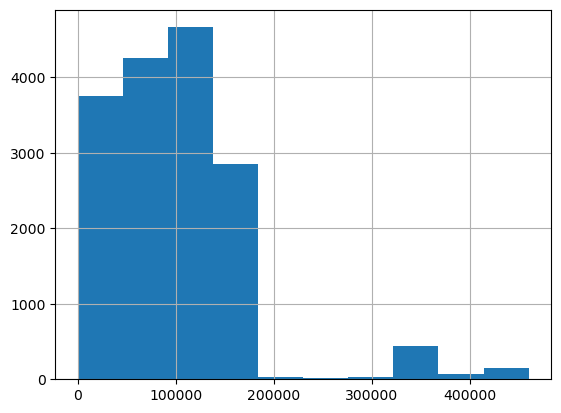

In [122]:
import matplotlib.pyplot as plt
data_pv['sam_id'].hist()
plt.show()

In [124]:
print(data_pv['status'].value_counts())

status
closed    14834
open       1442
Name: count, dtype: int64


In [126]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data_pv['status'] = le.fit_transform(data_pv['status'])

In [128]:
print(data_pv['status'].value_counts())

status
0    14834
1     1442
Name: count, dtype: int64


In [136]:
case_counts = data_pv['case_no'].value_counts()
case_nos_more_than_2 = case_counts[case_counts > 4].index

filtered_df = data_pv[data_pv['case_no'].isin(case_nos_more_than_2)]
print(filtered_df)

       case_no  ap_case_defn_key  status                    code  \
7384   V300321              1013       0               314.17(A)   
7385   V300321              1013       0             314.17.8(1)   
7386   V300321              1013       0                  110.12   
7387   V300321              1013       0                210.12 B   
7388   V300321              1013       0                   240.4   
...        ...               ...     ...                     ...   
14742   V97381              1013       0                  110.12   
14743   V97381              1013       0                312.5(A)   
14744   V97381              1013       0                  300.11   
14745   V97381              1013       0                  110.27   
14746   V97381              1013       0  MGL Chapter 143 Sec 3L   

                          description violation_stno violation_street  \
7384                         openings            105           Draper   
7385                         supports

In [140]:
filtered_df['description'].value_counts().head(10)
# filtered_df['code'].value_counts().head(10)


description
mechanical execution of work      21
uses not permitted                12
guarding of live parts            10
securing and supporting            9
unused openings                    6
openings to be closed.             6
mounting & cooling equipment       5
deteriorating agents               5
electrical work w/out a permit     4
wiring integrity                   4
Name: count, dtype: int64

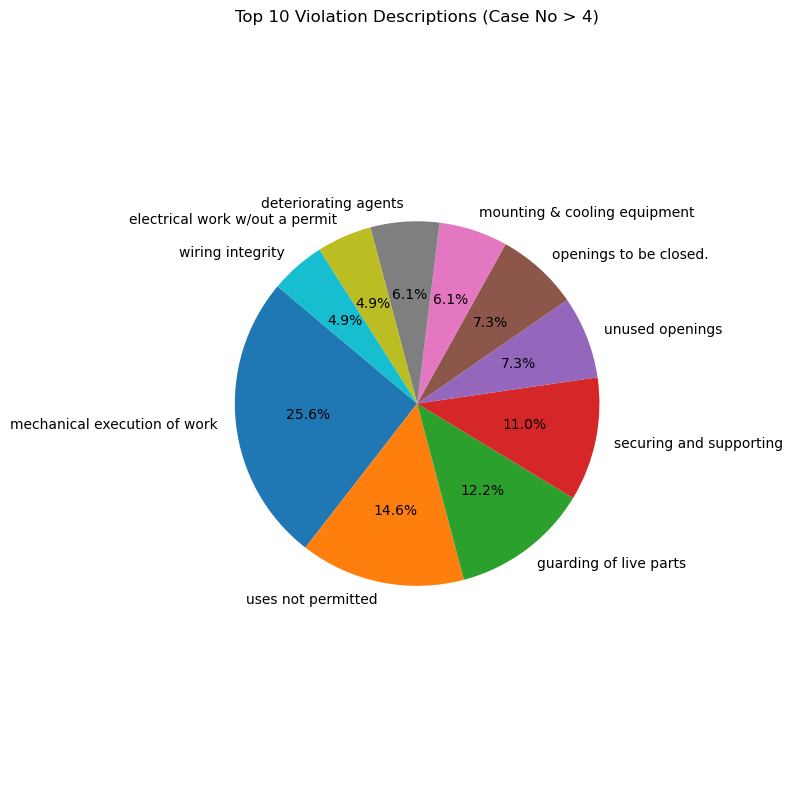

In [144]:
import pandas as pd
import matplotlib.pyplot as plt

# # Step 1: Filter for case_no with more than 4 entries
# case_counts = data_pv['case_no'].value_counts()
# case_nos_more_than_4 = case_counts[case_counts > 4].index
# filtered_df = data_pv[data_pv['case_no'].isin(case_nos_more_than_4)]

#Pie chart for top 10 descriptions
top_descriptions = filtered_df['description'].value_counts().head(10)

plt.figure(figsize=(8, 8))
plt.pie(top_descriptions, labels=top_descriptions.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Violation Descriptions (Case No > 4)')
plt.axis('equal')
plt.tight_layout()
plt.show()


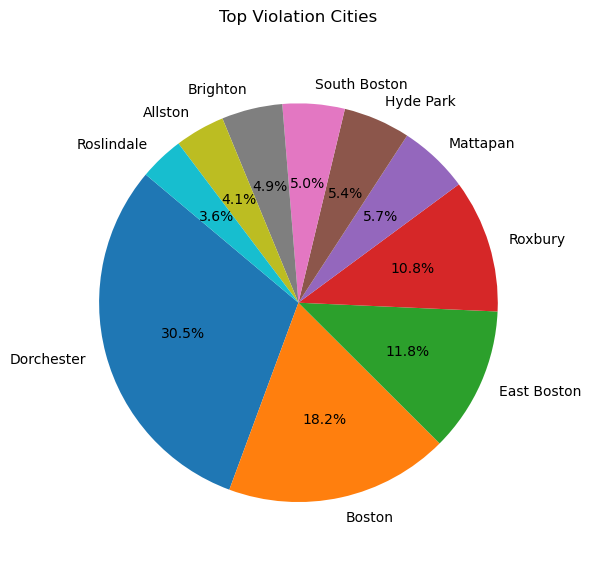

In [152]:
top_cities = data_pv['violation_city'].value_counts().head(10)

plt.figure(figsize=(6, 6))  # Smaller chart
plt.pie(top_cities, labels=top_cities.index, autopct='%1.1f%%', startangle=140)
plt.title('Top Violation Cities')
plt.axis('equal')
plt.tight_layout()
plt.show()


In [154]:
print(data_pv['description'].unique())

['unknown' 'testing & certification' 'unsafe structures'
 'failure to obtain permit' 'number of exits or exit access'
 'failed to comply w permit term' 'maintenance' 'permits' 'right of entry'
 'number of services' 'certificate of occupancy'
 'protection of adj. property'
 'conductors considered outside the building. conductors shall be considered outside of a building or other structure under any of the following conditions: sections 1-5.'
 'fire protection systems' 'suspension or revocation'
 'securing and supporting' 'guarding of live parts' 'periodic inspections'
 'accessible means of egress' 'no use of premises permit:'
 'unlawful continuance' 'party walls' 'pull & junction boxes'
 'emergency disconnects' 'water supply & the water distribution system'
 'hangers & supports' 'validity of permit' 'inspections'
 'maintenance of means of egress' 'accessory keeping of hens'
 'unsafe and dangerous' 'building or use of premise req' 'slope'
 'minimum number of exits' 'reg. of construction 

In [ ]:
def map_description(desc):
    desc = str(desc).lower()
    if 'permit' in desc or 'working without' in desc:
        return 'permit issues'
    elif 'unsafe' in desc or 'dangerous' in desc:
        return 'safety hazard'
    elif 'inspection' in desc:
        return 'inspection issues'
    elif 'egress' in desc or 'exit' in desc:
        return 'egress/exit'
    elif 'electrical' in desc or 'circuit' in desc or 'wiring' in desc:
        return 'electrical'
    elif 'fire' in desc or 'smoke' in desc or 'alarm' in desc:
        return 'fire safety'
    elif 'plumbing' in desc or 'water' in desc:
        return 'plumbing'
    elif 'structure' in desc or 'building' in desc or 'maintenance' in desc:
        return 'building/structure'
    elif 'mechanical' in desc:
        return 'mechanical'
    elif 'sign' in desc:
        return 'signage'
    elif 'occupancy' in desc:
        return 'occupancy'
    elif 'zoning' in desc or 'code' in desc:
        return 'zoning/code'
    else:
        return 'other'

# Apply to your DataFrame
data_pv['desc_group'] = data_pv['description'].apply(map_description)

# Optional: Preview the grouped categories
print(data_pv['desc_group'].value_counts())